In [1]:
from keras.datasets import fashion_mnist
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
import os, skimage.io,matplotlib.pyplot as plt, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import time

Using TensorFlow backend.


In [2]:
import seaborn as sn
import pandas as pd
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [3]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()
num_pixels = trainX.shape[1] * trainX.shape[2]

images = trainX/255
test_images = testX/255

images_flat = images.reshape(images.shape[0], num_pixels).astype('float32')
test_images_flat = test_images.reshape(test_images.shape[0], num_pixels).astype('float32')

train_images_flat,validation_images_flat,train_labels,validation_labels = train_test_split(images_flat, trainY, train_size=0.8, test_size=0.2,random_state=0)
test_labels = testY

15 sec
              precision    recall  f1-score   support

 T-shirt/Top       0.73      0.84      0.78      1000
     Trouser       0.98      0.93      0.95      1000
    Pullover       0.65      0.76      0.70      1000
       Dress       0.80      0.82      0.81      1000
        Coat       0.66      0.70      0.68      1000
      Sandal       0.92      0.87      0.90      1000
       Shirt       0.65      0.43      0.52      1000
     Sneaker       0.82      0.93      0.87      1000
         Bag       0.94      0.90      0.92      1000
  Ankle Boot       0.92      0.87      0.90      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000



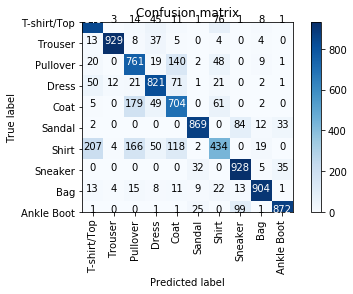

In [8]:
clf = DecisionTreeClassifier(
            criterion="entropy", 
            max_depth=10, 
            splitter="best", 
            random_state=500)
prev = int(round(time.time()))
clf.fit(train_images_flat, train_labels)
duration = int(round(time.time()))-prev
print("training time:",duration,"sec")
test_images_predict = clf.predict(test_images_flat)
 
confusion_mtx = confusion_matrix(test_labels, test_images_predict) 
plot_confusion_matrix(confusion_mtx, 
            classes)
print(classification_report(test_labels, test_images_predict, target_names = classes))

training time: 12 sec
              precision    recall  f1-score   support

 T-shirt/Top       0.79      0.77      0.78      1000
     Trouser       0.98      0.92      0.95      1000
    Pullover       0.68      0.65      0.67      1000
       Dress       0.79      0.83      0.81      1000
        Coat       0.61      0.73      0.67      1000
      Sandal       0.92      0.87      0.89      1000
       Shirt       0.55      0.51      0.53      1000
     Sneaker       0.86      0.92      0.89      1000
         Bag       0.92      0.90      0.91      1000
  Ankle Boot       0.92      0.91      0.92      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



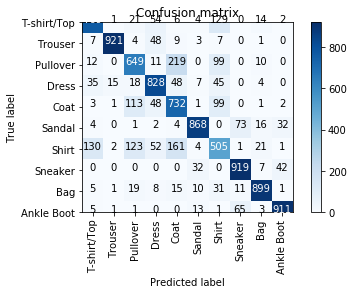

In [9]:
clf = DecisionTreeClassifier(
            criterion="gini", 
            max_depth=10, 
            splitter="best", 
            random_state=500)
prev = int(round(time.time()))
clf.fit(train_images_flat, train_labels)
duration = int(round(time.time()))-prev
print("training time:",duration,"sec")
test_images_predict = clf.predict(test_images_flat)
 
confusion_mtx = confusion_matrix(test_labels, test_images_predict) 
plot_confusion_matrix(confusion_mtx, 
            classes)
print(classification_report(test_labels, test_images_predict, target_names = classes))

training time: 22 sec
              precision    recall  f1-score   support

 T-shirt/Top       0.75      0.75      0.75      1000
     Trouser       0.95      0.94      0.95      1000
    Pullover       0.66      0.66      0.66      1000
       Dress       0.83      0.79      0.81      1000
        Coat       0.67      0.68      0.68      1000
      Sandal       0.91      0.89      0.90      1000
       Shirt       0.53      0.55      0.54      1000
     Sneaker       0.86      0.90      0.88      1000
         Bag       0.92      0.90      0.91      1000
  Ankle Boot       0.91      0.90      0.90      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



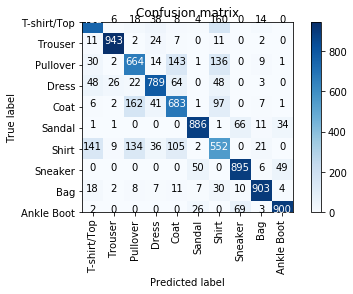

In [10]:
clf = DecisionTreeClassifier(
            criterion="entropy", 
            max_depth=100, 
            splitter="best", 
            random_state=500)
prev = int(round(time.time()))
clf.fit(train_images_flat, train_labels)
duration = int(round(time.time()))-prev
print("training time:",duration,"sec")
test_images_predict = clf.predict(test_images_flat)
 
confusion_mtx = confusion_matrix(test_labels, test_images_predict) 
plot_confusion_matrix(confusion_mtx, 
            classes)
print(classification_report(test_labels, test_images_predict, target_names = classes))

training time: 22 sec
              precision    recall  f1-score   support

 T-shirt/Top       0.75      0.75      0.75      1000
     Trouser       0.95      0.94      0.95      1000
    Pullover       0.66      0.66      0.66      1000
       Dress       0.83      0.79      0.81      1000
        Coat       0.67      0.68      0.68      1000
      Sandal       0.91      0.89      0.90      1000
       Shirt       0.53      0.55      0.54      1000
     Sneaker       0.86      0.90      0.88      1000
         Bag       0.92      0.90      0.91      1000
  Ankle Boot       0.91      0.90      0.90      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



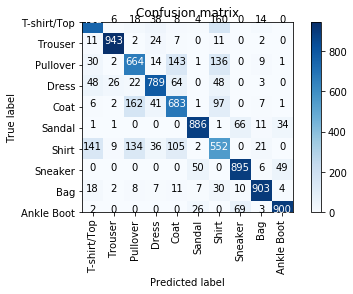

In [11]:
clf = DecisionTreeClassifier(
            criterion="entropy", 
            max_depth=50, 
            splitter="best", 
            random_state=500)
prev = int(round(time.time()))
clf.fit(train_images_flat, train_labels)
duration = int(round(time.time()))-prev
print("training time:",duration,"sec")
test_images_predict = clf.predict(test_images_flat)
 
confusion_mtx = confusion_matrix(test_labels, test_images_predict) 
plot_confusion_matrix(confusion_mtx, 
            classes)
print(classification_report(test_labels, test_images_predict, target_names = classes))

training time: 5 sec
              precision    recall  f1-score   support

 T-shirt/Top       0.76      0.76      0.76      1000
     Trouser       0.97      0.92      0.94      1000
    Pullover       0.66      0.62      0.64      1000
       Dress       0.79      0.80      0.80      1000
        Coat       0.60      0.73      0.66      1000
      Sandal       0.91      0.85      0.88      1000
       Shirt       0.54      0.47      0.50      1000
     Sneaker       0.84      0.90      0.87      1000
         Bag       0.93      0.91      0.92      1000
  Ankle Boot       0.89      0.89      0.89      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



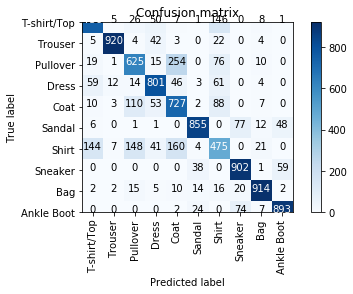

In [12]:
clf = DecisionTreeClassifier(
            criterion="gini", 
            max_depth=10, 
            splitter="random", 
            random_state=500)
prev = int(round(time.time()))
clf.fit(train_images_flat, train_labels)
duration = int(round(time.time()))-prev
print("training time:",duration,"sec")
test_images_predict = clf.predict(test_images_flat)
 
confusion_mtx = confusion_matrix(test_labels, test_images_predict) 
plot_confusion_matrix(confusion_mtx, 
            classes)
print(classification_report(test_labels, test_images_predict, target_names = classes))

training time: 6 sec
              precision    recall  f1-score   support

 T-shirt/Top       0.75      0.73      0.74      1000
     Trouser       0.95      0.94      0.95      1000
    Pullover       0.66      0.67      0.66      1000
       Dress       0.81      0.80      0.80      1000
        Coat       0.66      0.66      0.66      1000
      Sandal       0.91      0.89      0.90      1000
       Shirt       0.54      0.55      0.54      1000
     Sneaker       0.87      0.89      0.88      1000
         Bag       0.91      0.92      0.91      1000
  Ankle Boot       0.90      0.91      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



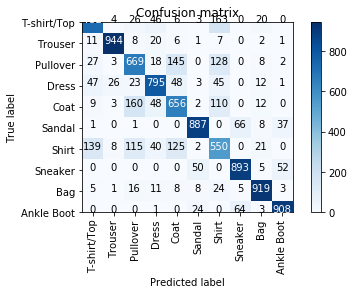

In [13]:
clf = DecisionTreeClassifier(
            criterion="entropy", 
            max_depth=50, 
            splitter="random", 
            random_state=500)
prev = int(round(time.time()))
clf.fit(train_images_flat, train_labels)
duration = int(round(time.time()))-prev
print("training time:",duration,"sec")
test_images_predict = clf.predict(test_images_flat)
 
confusion_mtx = confusion_matrix(test_labels, test_images_predict) 
plot_confusion_matrix(confusion_mtx, 
            classes)
print(classification_report(test_labels, test_images_predict, target_names = classes))

training time: 5 sec
              precision    recall  f1-score   support

 T-shirt/Top       0.75      0.73      0.74      1000
     Trouser       0.95      0.94      0.95      1000
    Pullover       0.66      0.67      0.66      1000
       Dress       0.81      0.80      0.80      1000
        Coat       0.66      0.66      0.66      1000
      Sandal       0.91      0.89      0.90      1000
       Shirt       0.54      0.55      0.54      1000
     Sneaker       0.87      0.89      0.88      1000
         Bag       0.91      0.92      0.91      1000
  Ankle Boot       0.90      0.91      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



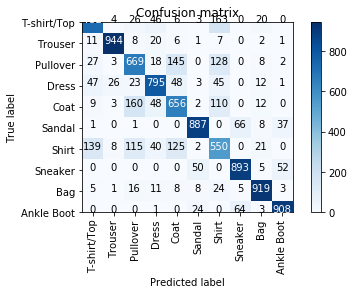

In [14]:
clf = DecisionTreeClassifier(
            criterion="entropy", 
            max_depth=100, 
            splitter="random", 
            random_state=500)
prev = int(round(time.time()))
clf.fit(train_images_flat, train_labels)
duration = int(round(time.time()))-prev
print("training time:",duration,"sec")
test_images_predict = clf.predict(test_images_flat)
 
confusion_mtx = confusion_matrix(test_labels, test_images_predict) 
plot_confusion_matrix(confusion_mtx, 
            classes)
print(classification_report(test_labels, test_images_predict, target_names = classes))

training time: 4 sec
              precision    recall  f1-score   support

 T-shirt/Top       0.75      0.77      0.76      1000
     Trouser       0.98      0.92      0.95      1000
    Pullover       0.67      0.67      0.67      1000
       Dress       0.78      0.84      0.81      1000
        Coat       0.64      0.69      0.66      1000
      Sandal       0.91      0.88      0.90      1000
       Shirt       0.58      0.51      0.54      1000
     Sneaker       0.85      0.88      0.87      1000
         Bag       0.93      0.92      0.93      1000
  Ankle Boot       0.89      0.91      0.90      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



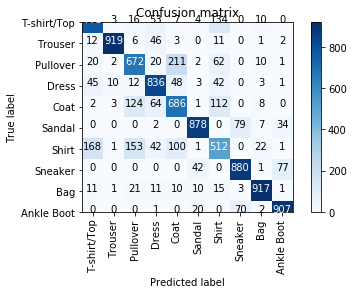

In [15]:
clf = DecisionTreeClassifier(
            criterion="entropy", 
            max_depth=10, 
            splitter="random", 
            random_state=500)
prev = int(round(time.time()))
clf.fit(train_images_flat, train_labels)
duration = int(round(time.time()))-prev
print("training time:",duration,"sec")
test_images_predict = clf.predict(test_images_flat)
 
confusion_mtx = confusion_matrix(test_labels, test_images_predict) 
plot_confusion_matrix(confusion_mtx, 
            classes)
print(classification_report(test_labels, test_images_predict, target_names = classes))

training time: 26 sec
              precision    recall  f1-score   support

 T-shirt/Top       0.75      0.73      0.74      1000
     Trouser       0.95      0.94      0.94      1000
    Pullover       0.65      0.68      0.66      1000
       Dress       0.82      0.79      0.80      1000
        Coat       0.66      0.65      0.65      1000
      Sandal       0.90      0.89      0.90      1000
       Shirt       0.51      0.55      0.53      1000
     Sneaker       0.87      0.89      0.88      1000
         Bag       0.91      0.91      0.91      1000
  Ankle Boot       0.92      0.91      0.91      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



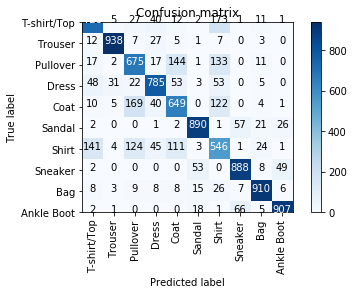

In [16]:
clf = DecisionTreeClassifier(
            criterion="gini", 
            max_depth=50, 
            splitter="best", 
            random_state=500)
prev = int(round(time.time()))
clf.fit(train_images_flat, train_labels)
duration = int(round(time.time()))-prev
print("training time:",duration,"sec")
test_images_predict = clf.predict(test_images_flat)
 
confusion_mtx = confusion_matrix(test_labels, test_images_predict) 
plot_confusion_matrix(confusion_mtx, 
            classes)
print(classification_report(test_labels, test_images_predict, target_names = classes))

training time: 26 sec
              precision    recall  f1-score   support

 T-shirt/Top       0.75      0.73      0.74      1000
     Trouser       0.95      0.94      0.94      1000
    Pullover       0.65      0.68      0.66      1000
       Dress       0.82      0.79      0.80      1000
        Coat       0.66      0.65      0.65      1000
      Sandal       0.90      0.89      0.90      1000
       Shirt       0.51      0.55      0.53      1000
     Sneaker       0.87      0.89      0.88      1000
         Bag       0.91      0.91      0.91      1000
  Ankle Boot       0.92      0.91      0.91      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



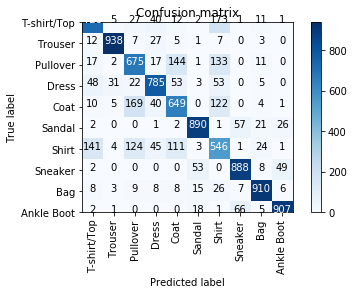

In [17]:
clf = DecisionTreeClassifier(
            criterion="gini", 
            max_depth=100, 
            splitter="best", 
            random_state=500)
prev = int(round(time.time()))
clf.fit(train_images_flat, train_labels)
duration = int(round(time.time()))-prev
print("training time:",duration,"sec")
test_images_predict = clf.predict(test_images_flat)
 
confusion_mtx = confusion_matrix(test_labels, test_images_predict) 
plot_confusion_matrix(confusion_mtx, 
            classes)
print(classification_report(test_labels, test_images_predict, target_names = classes))

training time: 6 sec
              precision    recall  f1-score   support

 T-shirt/Top       0.74      0.75      0.75      1000
     Trouser       0.94      0.94      0.94      1000
    Pullover       0.63      0.66      0.65      1000
       Dress       0.83      0.79      0.81      1000
        Coat       0.66      0.65      0.65      1000
      Sandal       0.89      0.88      0.88      1000
       Shirt       0.52      0.53      0.52      1000
     Sneaker       0.86      0.88      0.87      1000
         Bag       0.91      0.91      0.91      1000
  Ankle Boot       0.91      0.90      0.90      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



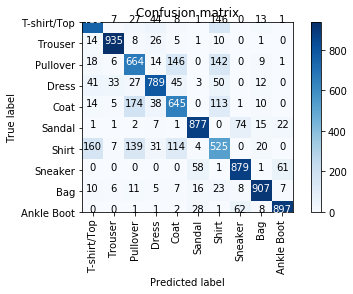

In [18]:
clf = DecisionTreeClassifier(
            criterion="gini", 
            max_depth=50, 
            splitter="random", 
            random_state=500)
prev = int(round(time.time()))
clf.fit(train_images_flat, train_labels)
duration = int(round(time.time()))-prev
print("training time:",duration,"sec")
test_images_predict = clf.predict(test_images_flat)
 
confusion_mtx = confusion_matrix(test_labels, test_images_predict) 
plot_confusion_matrix(confusion_mtx, 
            classes)
print(classification_report(test_labels, test_images_predict, target_names = classes))

training time: 5 sec
              precision    recall  f1-score   support

 T-shirt/Top       0.75      0.73      0.74      1000
     Trouser       0.95      0.94      0.95      1000
    Pullover       0.66      0.67      0.66      1000
       Dress       0.81      0.80      0.80      1000
        Coat       0.66      0.66      0.66      1000
      Sandal       0.91      0.89      0.90      1000
       Shirt       0.54      0.55      0.54      1000
     Sneaker       0.87      0.89      0.88      1000
         Bag       0.91      0.92      0.91      1000
  Ankle Boot       0.90      0.91      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



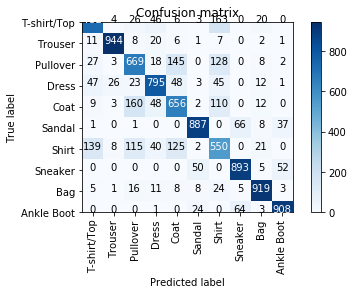

In [19]:
clf = DecisionTreeClassifier(
            criterion="entropy", 
            max_depth=100, 
            splitter="random", 
            random_state=500)
prev = int(round(time.time()))
clf.fit(train_images_flat, train_labels)
duration = int(round(time.time()))-prev
print("training time:",duration,"sec")
test_images_predict = clf.predict(test_images_flat)
 
confusion_mtx = confusion_matrix(test_labels, test_images_predict) 
plot_confusion_matrix(confusion_mtx, 
            classes)
print(classification_report(test_labels, test_images_predict, target_names = classes))